<a href="https://colab.research.google.com/github/DOINYNAM/Section-project/blob/main/S1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 컬럼명

*   Name : 게임의 이름입니다.
*   Platform : 게임이 지원되는 플랫폼의 이름입니다.
*   Year : 게임이 출시된 연도입니다.
*   Genre : 게임의 장르입니다.
*   Publisher : 게임을 제작한 회사입니다.
*   NA_Sales : 북미지역에서의 출고량입니다.
*   EU_Sales : 유럽지역에서의 출고량입니다.
*   JP_Sales : 일본지역에서의 출고량입니다.
*   Other_Sales : 기타지역에서의 출고량입니다.

## 참고단위

*   1000k = 1m

## 필수 포함 내용

1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


# 데이터셋 불러오기 및 데이터 기본 전처리

In [ ]:
import pandas as pd

url= 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df= pd.read_csv(url)

In [ ]:
df= df.iloc[:, 1:]

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 데이터 결측값 확인

df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df= df.dropna(axis=0).reset_index(drop= True)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# Year 컬럼 기준 오름차순 정렬

df.sort_values(by='Year', ascending=True)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9094,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
16042,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14352,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2206,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8507,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
1758,The King of Fighters XIV,PS4,2016.0,Fighting,Deep Silver,0.04,0.01,0.03,0.01
9911,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
5196,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
14903,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [ ]:
# Year 컬럼의 고유값 개수 확인

df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
12.0         2
97.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [ ]:
df= df.astype({'Year':'int'})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# Year 컬럼 내 데이터 전처리

def func(x) :
    if 0 <= x < 20 :
      x= x+2000
      return x

    elif 30 < x < 100 :
      x= x+1900
      return x

    else:
      return x

df["new_year"] = df["Year"].apply(lambda x : func(x))

In [ ]:
df['new_year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       8
2017       3
2020       1
Name: new_year, dtype: int64

In [ ]:
# 지역별 게임 판매량 데이터의 단위값 통일을 위한 전처리

df['NA_Sales']= df['NA_Sales'].replace({'K': '/1000', 'M':''}, regex=True).apply(pd.eval).astype(float)
df['EU_Sales']= df['EU_Sales'].replace({'K': '/1000', 'M': ''}, regex=True).apply(pd.eval).astype(float)
df['JP_Sales']= df['JP_Sales'].replace({'K': '/1000', 'M': ''}, regex=True).apply(pd.eval).astype(float)
df['Other_Sales']= df['Other_Sales'].replace({'K': '/1000', 'M': ''}, regex=True).apply(pd.eval).astype(float)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,new_year,total_Sale
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0.00,0.00,0.00,2008,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2009,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010,0.25


In [ ]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
new_year         int64
dtype: object

In [ ]:
df['total_Sale']= df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] 

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,new_year,total_Sale
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,2008,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2009,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2006,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,2005,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2015,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2013,0.38


In [ ]:
# 온전한 데이터셋 세팅 완료 - df

df.drop(['Year'], axis=1, inplace=True)

df

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,new_year,total_Sale
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0.00,0.00,0.00,2008,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2009,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2006,0.20
16237,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,0.01,0.00,0.00,0.00,2005,0.01
16238,NBA 2K16,PS3,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2015,0.79
16239,Toukiden: The Age of Demons,PSV,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2013,0.38


In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
                ... 
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, Length: 12, dtype: int64

# 1. 지역에 따라 게임의 선호 장르가 다른가?


*   카이제곱 분포를 기반으로 각 변수 간 독립성을 판단 및 검정
*   귀무가설(H0): 지역별로 선호하는 게임의 장르는 동일하다. (변수 간에 관련성이 없다. / 독립적이다.)
*   대립가설(H1): 지역별로 선호하는 게임의 장르는 다르다.
(변수 간에 관련성이 있다. / 독립적이지 않다.)





In [ ]:
# 카이제곱검정을 위한 데이터셋 생성

df1= df.iloc[:, [2,4,5,6,7]]

In [ ]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16236,Platform,0.15,0.04,0.00,0.01
16237,Action,0.01,0.00,0.00,0.00
16238,Sports,0.44,0.19,0.03,0.13
16239,Action,0.05,0.05,0.25,0.03


In [ ]:
# 장르를 기준으로 지역별 판매량을 정렬

df1= df1.groupby(df1['Genre']).sum()

In [ ]:
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
...,...,...,...,...
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86
Simulation,181.43,112.99,63.54,31.32


In [ ]:
import scipy.stats as stats

In [ ]:
result1= stats.chi2_contingency(df1)

result1

(684.336340516923,
 9.635373883711956e-123,
 33,
 array([[842.66837143, 468.29974503, 248.7462714 , 153.26561214],
        [115.12174823,  63.97710792,  33.98265154,  20.93849231],
        [218.19118114, 121.25633043,  64.40759449,  39.68489393],
        [383.55878598, 213.15678595, 113.22226051,  69.76216756],
        [407.31414544, 226.35845479, 120.23457673,  74.08282303],
        [118.42260683,  65.81150838,  34.95702805,  21.53885674],
        [355.44491575, 197.53294304, 104.92336069,  64.64878052],
        [443.48093003, 246.45757869, 130.91060674,  80.66088454],
        [504.10653576, 280.14930922, 148.80660697,  91.68754804],
        [191.49899218, 106.42256462,  56.52835908,  34.83008412],
        [642.13752173, 356.85786709, 189.55180907, 116.79280211],
        [ 85.09426549,  47.28980484,  25.11887472,  15.47705495]]))

In [ ]:
print('P-value:', result1[1])

P-value: 9.635373883711956e-123


# 검정 결과
**P-value(유의수준)이 9.6이므로, 지역과 선호 장르 간에는 통계적으로 유의한 관련성이 있는 것으로 나타났다.**

#2.   연도별 게임의 트렌드 유무 분석

In [ ]:
df

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,new_year,total_Sale
0,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0.00,0.00,0.00,2008,0.04
1,The Munchables,Wii,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2009,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010,0.02
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2006,0.20
16237,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,0.01,0.00,0.00,0.00,2005,0.01
16238,NBA 2K16,PS3,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2015,0.79
16239,Toukiden: The Age of Demons,PSV,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2013,0.38


In [ ]:
# 지역별 게임 구매량 합계열 생성 (total_Sale)

df2= df.iloc[:, [1,2,8,9]]

df2.head()

,Platform,Genre,new_year,total_Sale
0,DS,Action,2008,0.04
1,Wii,Action,2009,0.18
2,PSP,Adventure,2010,0.02
3,DS,Misc,2010,0.04
4,PS3,Platform,2010,0.25


In [ ]:
df2['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
        ... 
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, Length: 31, dtype: int64

In [ ]:
df2['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
                ... 
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, Length: 12, dtype: int64

In [ ]:
df2_G= df.groupby(['new_year', 'Genre'])['total_Sale'].sum().unstack().fillna(0)

df2_G

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
new_year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,99.01,6.09,16.15,23.73,8.87,1.50,16.71,45.88,65.99,5.54,46.64,0.97
2015,68.25,8.01,7.78,11.66,6.05,0.69,7.92,36.43,66.12,5.61,41.49,1.82
2016,19.84,1.79,3.85,1.15,2.08,0.00,1.67,6.75,18.17,0.39,14.63,0.52


In [ ]:
df2_G = df2_G.reset_index(drop=False)

df2_G

Genre,new_year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1,1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
2,1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
3,1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
4,1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2014,99.01,6.09,16.15,23.73,8.87,1.50,16.71,45.88,65.99,5.54,46.64,0.97
35,2015,68.25,8.01,7.78,11.66,6.05,0.69,7.92,36.43,66.12,5.61,41.49,1.82
36,2016,19.84,1.79,3.85,1.15,2.08,0.00,1.67,6.75,18.17,0.39,14.63,0.52
37,2017,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00


In [ ]:
df2_80= df2_G.iloc[0:10,:]

df2_80= df2_80.transpose()

df2_80

,0,1,2,3,4,5,6,7,8,9
Genre,,,,,,,,,,
new_year,1980.00,1981.00,1982.00,1983.00,1984.00,1985.00,1986.00,1987.00,1988.00,1989.00
Action,0.34,14.79,6.50,2.86,1.85,3.52,13.74,1.11,1.74,4.65
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00
Misc,2.70,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28
...,...,...,...,...,...,...,...,...,...,...
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20
Shooter,7.07,10.02,3.81,0.49,31.10,1.00,3.89,0.69,0.51,1.19
Simulation,0.00,0.44,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00


Text(0, 0.5, 'Sum of total sale')

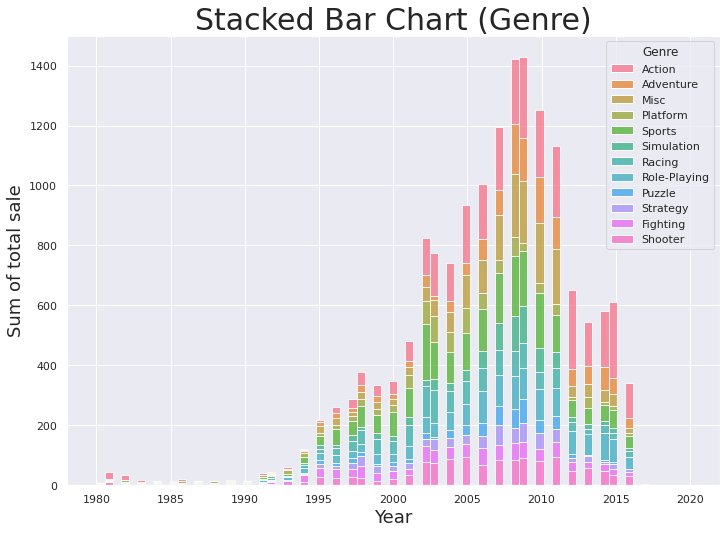

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax= sns.histplot(data=df2, x='new_year', hue='Genre', multiple='stack')
sns.set(rc={'figure.figsize':(20.7,15.27)})

ax.set_title('Stacked Bar Chart (Genre)', fontsize=30)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Sum of total sale', fontsize=18)

#3.   출고량이 높은 게임에 대한 분석 및 시각화

In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted      12
LEGO Marvel Super Heroes          9
Ratatouille                       9
FIFA 14                           9
LEGO Jurassic World               8
                                 ..
Virtual Villagers: A New Home     1
Monster Rancher EVO               1
Petz Rescue: Ocean Patrol         1
I Spy: Spooky Mansion             1
Crazy Taxi: Fare Wars             1
Name: Name, Length: 11295, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df3= df.groupby(['Name','Genre','Platform'])['total_Sale'].sum().head(10)
df3= pd.DataFrame(df3)
df3= df3.reset_index()

df3['Sale_ratio']= (df3['total_Sale']/df3['total_Sale'].sum())*100

df3

,Name,Genre,Platform,total_Sale,Sale_ratio
0,'98 Koshien,Sports,PS,0.40,10.416667
1,.hack//G.U. Vol.1//Rebirth,Role-Playing,PS2,0.17,4.427083
2,.hack//G.U. Vol.2//Reminisce,Role-Playing,PS2,0.23,5.989583
3,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,PS2,0.16,4.166667
4,.hack//G.U. Vol.3//Redemption,Role-Playing,PS2,0.17,4.427083
5,.hack//Infection Part 1,Role-Playing,PS2,1.26,32.812500
6,.hack//Link,Role-Playing,PSP,0.14,3.645833
7,.hack//Mutation Part 2,Role-Playing,PS2,0.67,17.447917
8,.hack//Outbreak Part 3,Role-Playing,PS2,0.46,11.979167
9,.hack//Quarantine Part 4: The Final Chapter,Role-Playing,PS2,0.18,4.687500


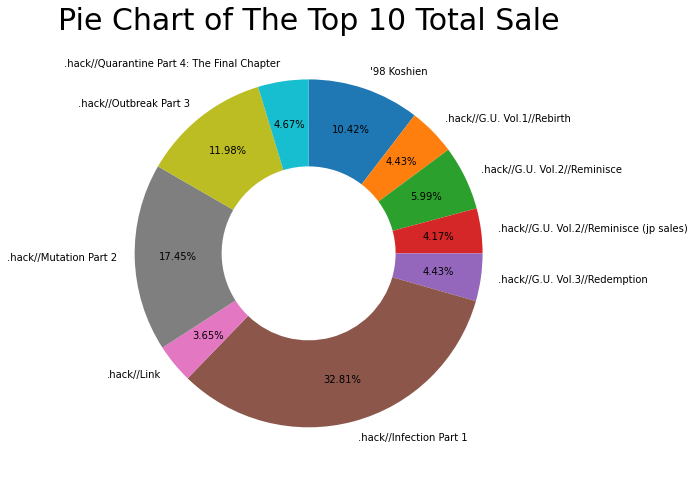

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
ratio = df3['total_Sale']
labels = df3['Name']

fig = plt.figure(figsize=(15,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(ratio, ## 파이차트 출력
             labels= labels,
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
total = np.sum(ratio) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(labels):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(labels) - 1:
        sum_pct += float(f'{ratio[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{ratio[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 

plt.title('Pie Chart of The Top 10 Total Sale', fontsize=30)

plt.show()